In [3]:
%pip install opencv-python numpy matplotlib
%pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -------- ------------------------------- 7.9/38.8 MB 44.2 MB/s eta 0:00:01
   ------------------- -------------------- 18.9/38.8 MB 47.6 MB/s eta 0:00:01
   ------------------------------ --------- 29.6/38.8 MB 49.4 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.8 MB 49.3 MB/s eta 0:00:01
   ---------------------------------------- 38.8/38.8 MB 40.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/898.5 kB ? eta -:--:--
   ----------------------------------- ---- 786.4/898.5 kB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 898.5/898.5 kB 4.1 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


Qs 1: [2 Marks] Implement the Harris algorithm using OpenCV.

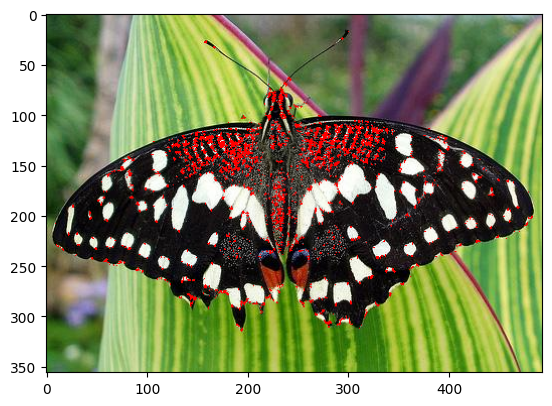

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    img[corners > 0.01 * corners.max()] = [0, 0, 255]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

harris_corner_detection('butterfly.jpg')


Qs 2: [2 Marks] Implement Image Pyramid using OpenCV.

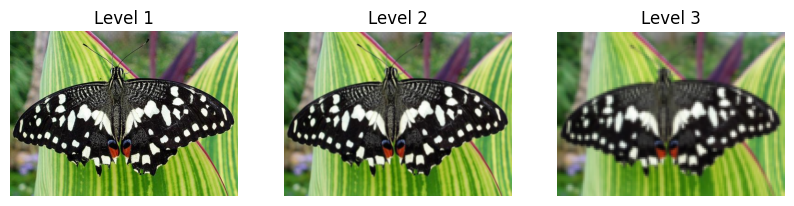

In [ ]:
import cv2
import matplotlib.pyplot as plt

def image_pyramid(image_path):
    img = cv2.imread(image_path)
    layer = img.copy()
    plt.figure(figsize=(10, 10))
    for i in range(3):  
        plt.subplot(1, 3, i + 1)
        plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB))
        plt.title(f'Level {i + 1}')
        plt.axis('off')
        layer = cv2.pyrDown(layer)
    plt.show()

image_pyramid('butterfly.jpg')


Qs 3:
- [3 Marks] Implement the SURF algorithm using OpenCV.

Or

- [3 Marks] Implement Image Segmentation with Watershed Algorithm using OpenCV.

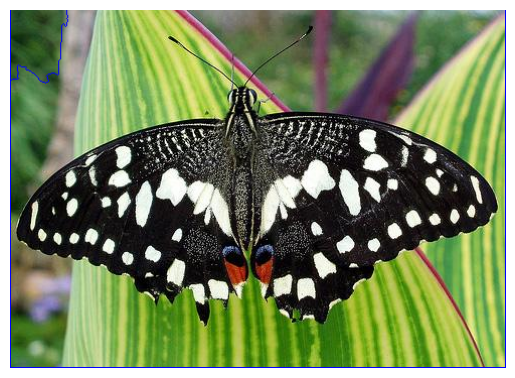

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def watershed_segmentation(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)  # Ensure same type as sure_bg
    unknown = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(sure_fg)
    markers += 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

watershed_segmentation('butterfly.jpg')

Qs 4: [3 Marks] Implement SIFT algorithm using OpenCV.

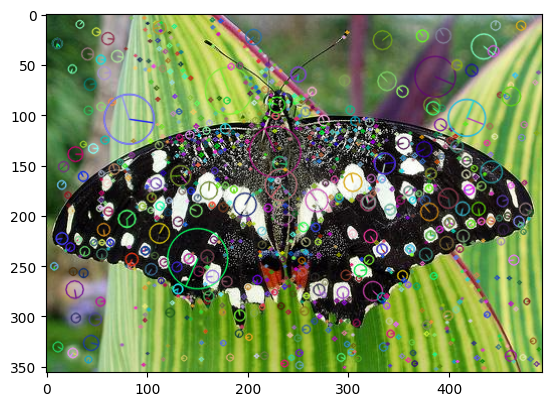

In [19]:
import cv2
import matplotlib.pyplot as plt

def sift_algorithm(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    img_sift = cv2.drawKeypoints(img, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.imshow(cv2.cvtColor(img_sift, cv2.COLOR_BGR2RGB))
    plt.show()

sift_algorithm('butterfly.jpg')


Qs 5: [5 Marks] Implement object detection using YOLO on the COCO dataset. Provide the
results for any 5 images (for testing purposes) from the dataset.


image 1/1 c:\Users\Manju\Documents\Assignments\sem 2\AIDI1007 Vision Systems\image1.jpg: 384x640 1 cat, 1 dog, 98.5ms
Speed: 3.0ms preprocess, 98.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


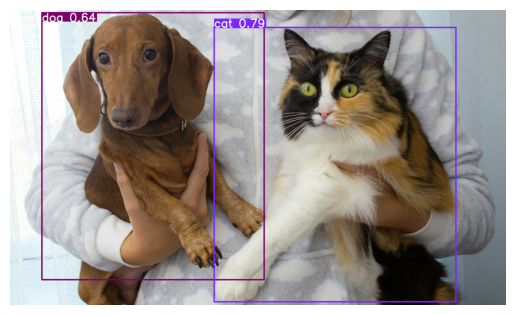


image 1/1 c:\Users\Manju\Documents\Assignments\sem 2\AIDI1007 Vision Systems\cameraman.jpg: 640x640 1 person, 138.1ms
Speed: 3.0ms preprocess, 138.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


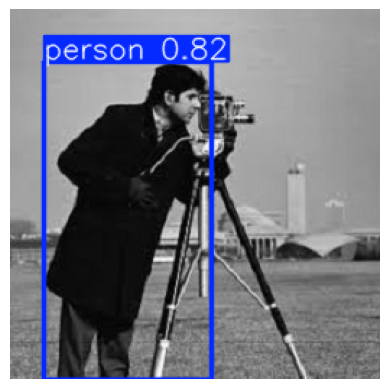


image 1/1 c:\Users\Manju\Documents\Assignments\sem 2\AIDI1007 Vision Systems\players.jpg: 448x640 3 persons, 2 sports balls, 113.1ms
Speed: 3.0ms preprocess, 113.1ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


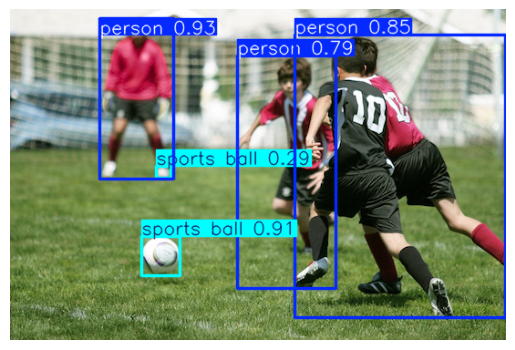


image 1/1 c:\Users\Manju\Documents\Assignments\sem 2\AIDI1007 Vision Systems\image2.jpg: 640x448 2 dogs, 106.0ms
Speed: 2.0ms preprocess, 106.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


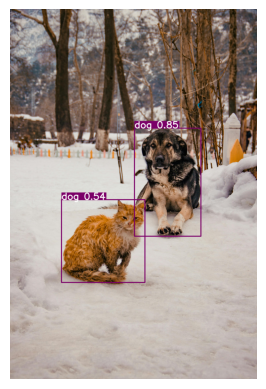


image 1/1 c:\Users\Manju\Documents\Assignments\sem 2\AIDI1007 Vision Systems\image3.jpg: 448x640 4 elephants, 97.2ms
Speed: 4.1ms preprocess, 97.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


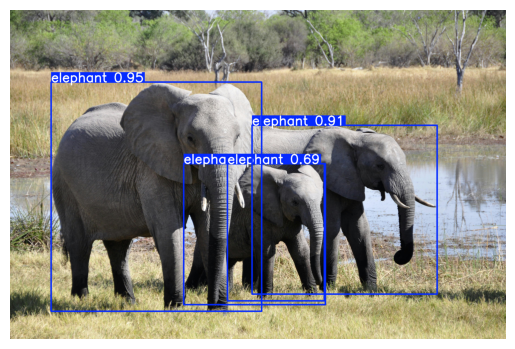

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def yolo_object_detection(image_path):
    model = YOLO('yolov8n.pt')  # Download YOLOv8 weights
    results = model(image_path)
    result_img = results[0].plot()
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Replace with paths to 5 test images
for img_path in ['image1.jpg', 'cameraman.jpg', 'players.jpg', 'image2.jpg', 'image3.jpg']:
    yolo_object_detection(img_path)
